# problem statement - to establish relationship between mpg and other attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [2]:
df=pd.read_csv("C:/Users/Nikhil Sukthe/Downloads/auto-mpg.csv")

In [3]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
268,27.2,4,119.0,97,2300,14.7,78,3,datsun 510
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
125,20.0,6,198.0,95,3102,16.5,74,1,plymouth duster
158,16.0,8,318.0,150,4498,14.5,75,1,plymouth grand fury
89,15.0,8,318.0,150,3777,12.5,73,1,dodge coronet custom
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
210,19.0,6,156.0,108,2930,15.5,76,3,toyota mark ii
365,20.2,6,200.0,88,3060,17.1,81,1,ford granada gl
53,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
df["horsepower"].value_counts()   

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

In [8]:
df.shape

(398, 9)

In [9]:
df=df.drop("car name",axis=1)

In [10]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
98,16.0,6,250.0,100,3278,18.0,73,1


In [11]:
df["origin"]=df["origin"].replace({1:"America",2:"Europe",3:"Asia"})

In [12]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
241,22.0,6,146.0,97,2815,14.5,77,Asia


In [29]:
df['horsepower']=df['horsepower'].replace('?',np.nan)   #np.man means where ever there is a q mark convert into null value
median1

93.5

In [28]:
df['horsepower']=df['horsepower'].astype(float)
median1

93.5

In [27]:
median1=df["horsepower"].median()
median1


93.5

In [15]:
df['horsepower'].replace(np.nan,median1,inplace=True)

In [16]:
df['horsepower']=df['horsepower'].replace(np.nan,median1)
df['horsepower']=df['horsepower'].astype(float)

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [18]:
df=pd.get_dummies(df,columns=["origin"])

In [19]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
187,17.5,8,305.0,140.0,4215,13.0,76,1,0,0


In [20]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

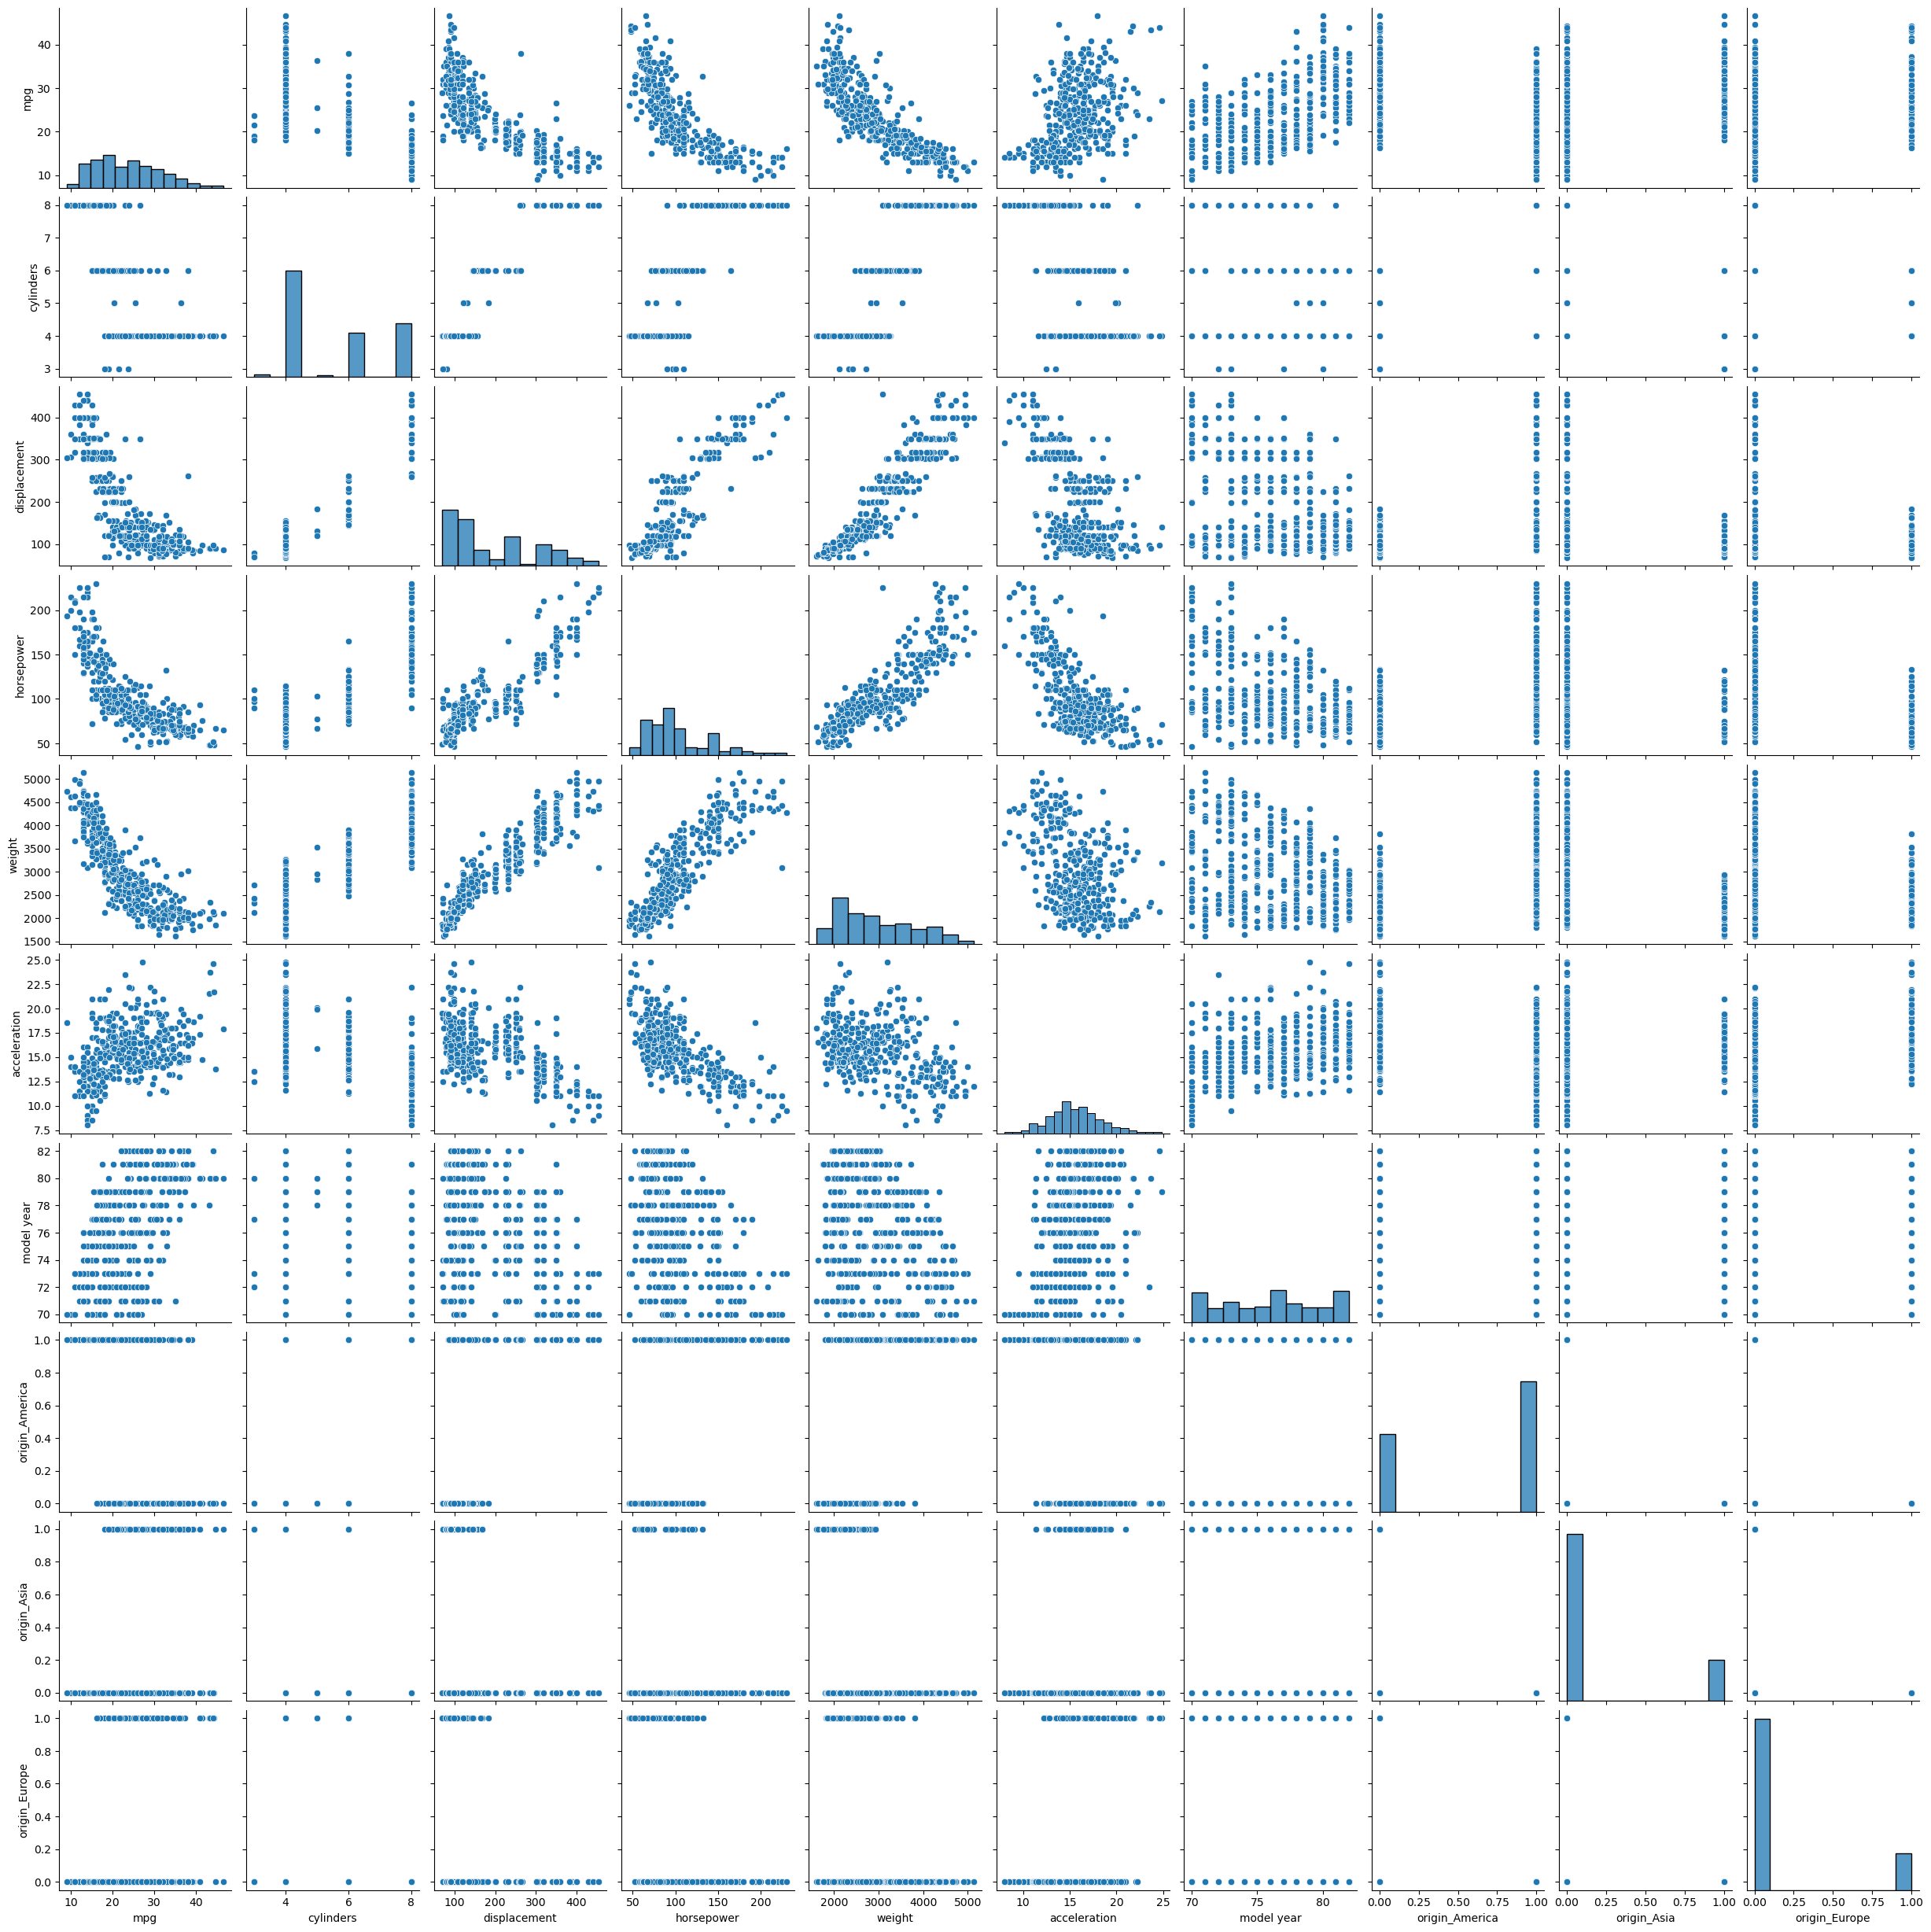

In [21]:
sns.pairplot(df)

In [22]:
Y=df["mpg"]
X=df.drop(["mpg"],axis=1)

In [23]:
#split into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
### fit linear regression
model1=LinearRegression()

In [25]:
model1.fit(X_train,Y_train)

LinearRegression()

In [26]:
model1.score(X_train,Y_train)

0.8141025501610559